# Plus proches voisins et apprentissage

Dans le cadre de ce TP, on s'intéresse à l'implémentation $\texttt{sklearn}$ des algorithmes de plus proches voisins, ainsi qu'aux classificateurs et régresseurs qui en découlent naturellement. On considérera dans chaque cas deux datasets : un dataset synthétique à des fins didactiques et un dataset "réel" plus proche de cas d'usage (simples).

## 1. Recherche de plus proches voisins

### 1.1 Dataset synthétique


$\textbf{Question 1}$ :

a) Générer un nuage de $200$ points $x^{(k)}$ dans $\mathbb{R}^2$ générés à partir de vecteurs gaussiens.

b) Séparer ce dataset en deux lots : un lot d'entrainement contenant 80% des points ainsi qu'un lot de test.

c) En vous aidant de la librairie $\texttt{NearestNeighbors}$, construire les matrices de distance $D$ et une liste des voisinages $\mathcal{V}_3(x)$ pour chaque point $x$ du dataset. Identifier la fonction adéquate.

d) Identifier la liste des 4 plus proches voisins ainsi que la distance à ces plus proches voisins pour les points des lots d'entrainement et de test.

e) Tester la méthode kneighbours_graph sur le lot d'entrainement. A quoi correspond l'output de cette fonction.


In [ ]:
from sklearn.datasets import make_blobs


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

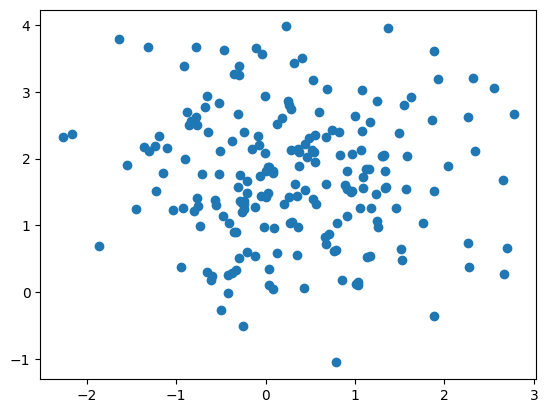

In [ ]:
#a: les 200 points générés à partir de vecteurs gaussiens

#générer 200 blobs gaussiens
X, y = make_blobs(n_samples=200, n_features=2, centers = 1, center_box = (-4, 4), random_state=0)

#graphique de dispersion
plt.scatter(X[:,0], X[:,1])

plt.show()

Taille du lot d'entraînement: 160
Taille du lot de test: 40


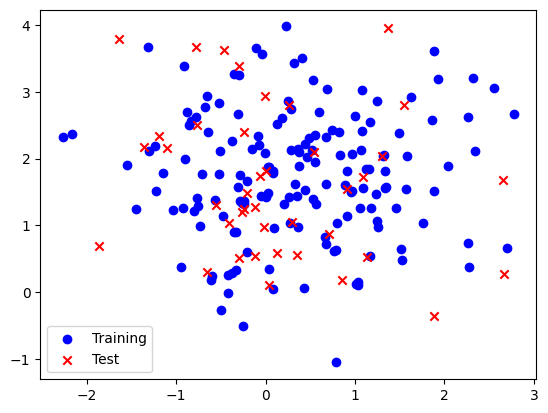

In [ ]:
#b: séparation du dataset x en 2 lots:  : un lot d'entrainement contenant 80% des points ainsi qu'un lot de test.
##la fonction train_test_split permet de séparer les données en 2 lots
#le paramètre test_size=0.2 indique que 20% des données doivent être utilisées pour le lot de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(f"Taille du lot d'entraînement: {len(X_train)}")
print(f"Taille du lot de test: {len(X_test)}")

plt.scatter(X_train[:, 0], X_train[:, 1],  marker="o", label="Training", c='blue')
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", label="Test", c='red')
plt.legend()
plt.show()

In [ ]:
#Question 1 c)

#utilisation de la classe NearestNeighbors pour trouver les k plus proches voisins d'un point d'un ensemble de points
#n_neighbors: le nombre de voisins à trouver
#on ajuste le modèle aux données du lot d'entrainement avec .fit()
nbk = NearestNeighbors(n_neighbors=4).fit(X_train)

#utilisation de la fonction kneighbors
#pour trouver les distances et les indices des 4 plus proches voisins de chaque point dans le lot d’entraînement
nb4 = NearestNeighbors(n_neighbors=5).fit(X_test)
distances, indices = nb4.kneighbors(X_test)
print("distances: \n", distances)
print("indices: \n", indices)

#matrice de distance D entre les points du lot d’entraînement
#.toarray()  pour un tableau numpy
print("Matrice D: \n", nbk.kneighbors_graph(X_train, n_neighbors=3).toarray())


#d) Identifier la liste des 4 plus proches voisins ainsi que la distance à ces plus proches voisins pour les points des lots d'entrainement et de test.
distances_train, indices_train = nb4.kneighbors(X_train)
distances_test, indices_test = nb4.kneighbors(X_test)

print(f"Indices des 4 plus proches voisins pour les points du lot d'entraînement:\n{indices_train}")
print(f"Indices des 4 plus proches voisins pour les points du lot de test:\n{indices_test}")

print(f"Distances aux 4 plus proches voisins pour les points du lot d'entrainement:\n{distances_train}")
print(f"Distances aux 4 plus proches voisins pour les points du lot de test:\n{distances_test}")



distances: 
 [[0.         0.04689279 0.12598366 0.24504513 0.27243263]
 [0.         0.19401587 0.26488461 0.47865121 0.88764721]
 [0.         0.22623287 0.27243263 0.31306807 0.38669545]
 [0.         0.24783933 0.378253   0.65997872 0.94045743]
 [0.         1.27078372 1.44711233 1.48983667 1.55586087]
 [0.         0.53077828 0.59351814 0.63387947 0.64280576]
 [0.         1.17417777 1.60948385 1.71666114 1.76144623]
 [0.         0.30586834 0.64280576 0.75679073 0.8008369 ]
 [0.         0.18016403 0.24870215 0.4439457  0.4633839 ]
 [0.         0.32616246 0.45352388 0.46892656 0.49441583]
 [0.         0.2185086  0.24504513 0.28855338 0.29211675]
 [0.         0.12598366 0.16508991 0.2185086  0.3239424 ]
 [0.         0.23194032 0.471689   0.47195919 0.5080724 ]
 [0.         0.10440869 0.39437891 0.5468505  0.60988695]
 [0.         0.24783933 0.62336517 0.66169951 0.7141859 ]
 [0.         0.18016403 0.41536378 0.42882957 0.52321167]
 [0.         0.31369764 0.56562093 0.86603749 1.0549467 ]
 

### 1.2 Digits dataset

$\textbf{Question 2}$ :

a) Charger le dataset "digits" à partir de scikit-learn. Combien de classes et combien d'images comporte ce dataset ?

b) Séparer ce dataset en deux lots : un lot d'entrainement contenant 80% des points ainsi qu'un lot de test.

c) Construire un modèle de recherche des 5 plus proches voisins à partir des échantillons d'entrainement en s'appuyant sur une représentation de type "Ball Tree"

d) Visualiser un échantillon de test. Utiliser le modèle pour identifier puis visualiser ses 5 plus proches voisins.



In [ ]:
from sklearn.datasets import load_digits

#Load and return the digits dataset (classification).
#Each datapoint is a 8x8 image of a digit.
digits = load_digits()

nb_de_classes = len(digits.target_names)
nb_images = len(digits.images)

print(f"Ce dataset comporte {nb_de_classes} classes (une pour chaque chiffre de 0 à 9)")
print(f"Et un total de {nb_images} images")



Ce dataset comporte 10 classes (une pour chaque chiffre de 0 à 9)
Et un total de 1797 images


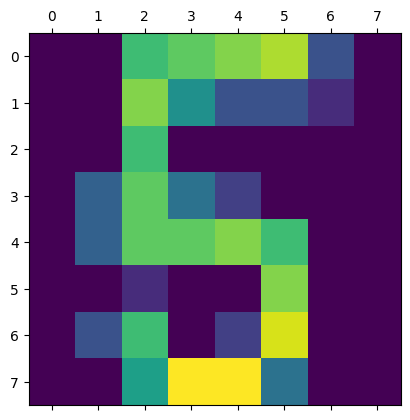

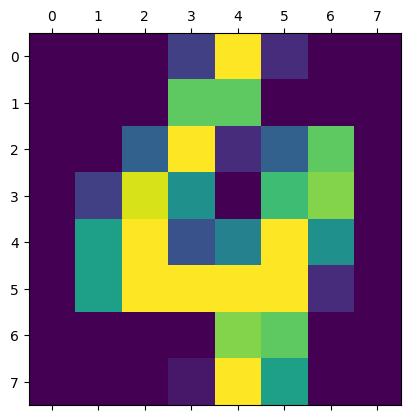

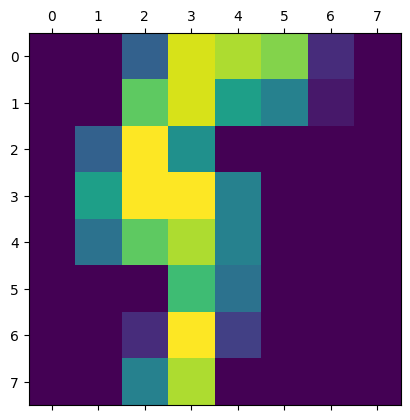

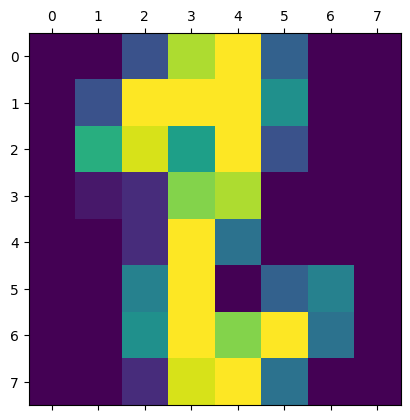

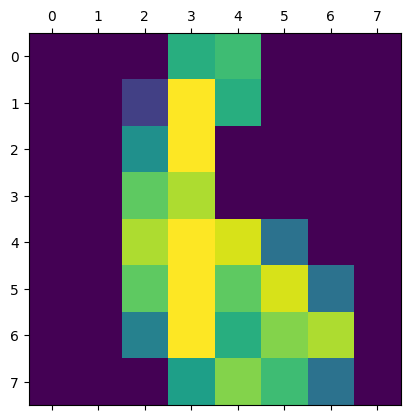

In [ ]:
#b: Séparer ce dataset en deux lots : un lot d'entrainement contenant 80% des points ainsi qu'un lot de test.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
"""
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", label="Training")
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", label="Test", color="red")
plt.legend()
plt.show()
"""
for i in indices[0]:
    plt.matshow(X_train[i].reshape([8,8]))
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree')

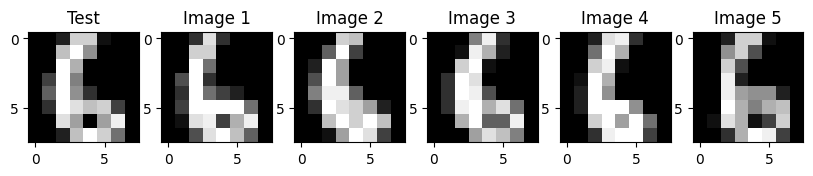

In [ ]:
# Sélectionner un échantillon de test aléatoire
idx = np.random.randint(0, len(X_test))
x = X_test[idx]

# Trouver les 5 plus proches voisins de l'échantillon dans les données d'entraînement
distances, indices = knn.kneighbors(x.reshape(1, -1))
neighbors = X_train[indices[0]]

# plot de l'échantillon de test et ses 5 plus proches voisins
plt.figure(figsize=(10, 2))
plt.subplot(1, 6, 1)
plt.imshow(x.reshape(8, 8), cmap='gray')
plt.title('Test')
for i in range(5):
    plt.subplot(1, 6, i+2)
    plt.imshow(neighbors[i].reshape(8, 8), cmap='gray')
    plt.title(f'Image {i+1}')
plt.show()

## 2. Classification via plus proches voisins

### 2.1 Dataset synthétique


$\textbf{Question 3}$ :

a) Reprendre un dataset du type de la question 1 an agmentant le nombre de points ($M=1000$) et en distinguant à présent 4 étiquettes distinctes (nombre de clusters). On choisira Cluster_std de sorte que le problème de classification ne soit ni trivial ni trop compliqué.

b) Proposer et évaluer une classification des différents échantillons du lot de test en vous basant sur $\texttt{KNeighborsClassifier}$.

c) Comparer les performances et le temps calcul pour les techniques 'brute', 'kd_tree' et 'ball_tree'.

d) Comparer ces performances avec celles d'un classificateur bayésien naïf gaussien.



In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time

In [ ]:
#Question 3 a): reprise du dataset de la question1 avec un nombre de points égal à 1000 avec un choix de cluster_std à 1.5
#on distingue à présent 4 étiquettes distinctes
X, y = make_blobs(n_samples=1000, centers=4, n_features = 2, cluster_std=1.5, random_state=0)

In [ ]:
#Question 3 b): évaluation d'une classification des différents échantillons du lot de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#on se base sur KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#print(f'Accuracy: {accuracy}')

#Question 3 c): Comparer les performances et le temps calcul pour les techniques 'brute', 'kd_tree' et 'ball_tree'.

knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)
#print(neigh.kneighbors(X_test))

t1=time.time()
knbrute = KNeighborsClassifier(n_neighbors=3,algorithm='brute').fit(X_train, y_train)
knbrute.predict(X_test)
r1 =time.time()
print ("temps calcul brute :",r1 - t1)

t2=time.time()
kn_kdtree = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree').fit(X_train, y_train)
kn_kdtree.predict(X_test)
r2 =time.time()
print ("temps calcul kd_tree :",r2 -t2)

t3=time.time()
kn_balltree = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree').fit(X_train, y_train)
kn_balltree.predict(X_test)
r3 =time.time()
print ("temps calcul ball_tree :",r3 - t3)


y_pred_brute = knbrute.predict(X_test)
acc_brute = accuracy_score(y_test, y_pred_brute)

y_pred_kd_tree = kn_kdtree.predict(X_test)
acc_kd_tree = accuracy_score(y_test, y_pred_kd_tree)

y_pred_ball_tree = kn_balltree.predict(X_test)
acc_ball_tree = accuracy_score(y_test, y_pred_ball_tree)

print("Accuracy brute:", acc_brute)
print("Accuracy brute:", acc_kd_tree)
print("Accuracy brute:", acc_ball_tree)

temps calcul brute : 0.1375279426574707
temps calcul kd_tree : 0.1727609634399414
temps calcul ball_tree : 0.10758614540100098
Accuracy brute: 0.9916666666666667
Accuracy brute: 0.9916666666666667
Accuracy brute: 0.9916666666666667



### 2.2  Digits dataset

$\textbf{Question 4}$ :

On s'intéresse à nouveau au "digits" dataset. On reprend exactement le cadre de la question 2.

a) Proposer une représentation bidimensionnelle du dataset (en utilisant "à l'aveugle" une technique de réduction de dimension.

b) Estimer les performances du classificateur $\texttt{KNeighborsClassifier}$ pour ce dataset.

c) Comment cette performance évolue-t-elle en fonction de l'hyperparamètre $k$ (nombre de voisins).

d) Comparer les performances du $\texttt{KNeighborsClassifier}$ "optimal" avec celles d'un classificateur bayésien naïf.


Accuracy 4b: 0.9916666666666667
performance dataset digit question 4 : 5.602836608886719e-05
Accuracy Gauss: 0.8666666666666667
Execution time: 0.005220651626586914


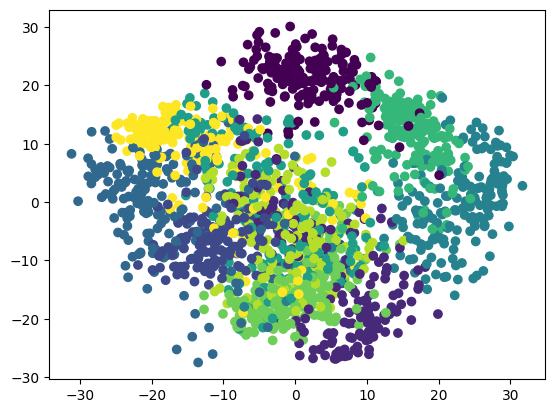

In [ ]:
#question 4a: Proposer une représentation bidimensionnelle du dataset (en utilisant "à l'aveugle" une technique de réduction de dimension
from sklearn.decomposition import PCA

#dataset "digits"
digits = load_digits()

X = digits.data
y = digits.target #les classes


pca= PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

#plt.show()

#question 4b) Estimation des performances du classificateur  KNeighborsClassifier  pour ce dataset
knn4 = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree').fit(X_train, y_train)
knn4.predict(X_test)
t1=time.time()
r1 =time.time()


y_pred_knn4 = knn4.predict(X_test)
accuracy_4b = accuracy_score(y_test, y_pred_knn4)

print("Accuracy 4b:", accuracy_4b)
print(f"performance dataset digit question 4 :",r1 - t1)


#d
from sklearn.naive_bayes import GaussianNB

st_bayn = time.time()

bayn = GaussianNB().fit(X_train, y_train)
#
et_bayn = time.time()

y_pred = bayn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Gauss:", accuracy)
print("Execution time:", et_bayn - st_bayn)


## 3. Régression via plus proches voisins

### 3.1 Dataset synthétique


$\textbf{Question 5}$ :

a) Générer un dataset synthétique pour un modèle de régression, comportant 500 échantillons $x^{(k)}$ tel que $x^{(k)} \in \mathbb{R}^2$ et $\texttt{noise}=16$. (utiliser la fonction $\texttt{sklearn}$ prédéfinie)

Séparer ce dataset en deux lots : un lot d'entrainement contenant 80% des points ainsi qu'un lot de test.

b) Proposer une visualisation dans le plan du dataset ainsi généré

c) Estimer les performances du classificateur $\texttt{RadiusNeighborsRegressor}$ pour ce dataset ($r=1.0$ par défaut).

d) Comment cette performance évolue-t-elle en fonction de l'hyperparamètre $r$ (rayon du voisinage) ?

e) Comparer la performance du modèle "optimal" $\texttt{RadiusNeighborsRegressor}$ avec celle d'$\texttt{ElasticNet}$.


In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=2, noise=16)

$\textbf{Question 6}$ :

a) Charger le dataset "diabetes" à partir de scikit-learn. Combien de classes et de features comporte ce dataset ?

b) Comparer les performances $\texttt{RadiusNeighborsRegressor}$ avec celle d'$\texttt{ElasticNet}$ pour le problème de régression associé à ce dataset.